In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from joblib import dump

In [2]:
df=pd.read_csv("/content/data.csv")
df

,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,ALQ151,ALQ170,...,WHD080S,WHD080T,WHD080U,WHD080L,WHQ225,WHD110,WHD120,WHD130,WHD140,WHQ150
0,109266.0,1.0,1.000000e+01,1.0,5.397605e-79,NaN,NaN,NaN,2.0,5.397605e-79,...,NaN,46.0,NaN,NaN,2.0,NaN,210.0,NaN,218.0,28.0
1,109271.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,148.0,19.0
2,109273.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,135.0,11.0
3,109274.0,1.0,4.000000e+00,2.0,5.000000e+00,7.0,5.397605e-79,NaN,2.0,5.397605e-79,...,NaN,NaN,NaN,NaN,4.0,280.0,350.0,NaN,350.0,24.0
4,109282.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,2.0,150.0,155.0,NaN,300.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
keyword_list = [
    'ALQ121',
    'ALQ130',
    'ALQ151',
    'BPQ020',
    'BPQ050A',
    'BPQ090D',
    'CDQ001',
    'CDQ002',
    'CDQ008',
    'CBQ506',
    'CBQ551',
    'CBQ645',
    'DIQ060U',
    'DIQ260U',
    'DIQ350U',
    'DBQ223A',
    'DBD895',
    'DBD900',
    'DBD905',
    'DBD910',
    'MCQ010',
    'MCQ080',
    'MCQ092',
    'MCQ520',
    'MCQ550',
    'MCQ220',
    'SLD012',
    'SLD013',
    'SLQ050',
    'SLQ120',
    'SMQ050U',
    'SMQ621',
    'WHQ030',
    'WHD080N',
    'DPQ090',
    'BMXBMI',
    'DIQ080'
]


df_extracted=df[keyword_list]
df_extracted

,ALQ121,ALQ130,ALQ151,BPQ020,BPQ050A,BPQ090D,CDQ001,CDQ002,CDQ008,CBQ506,...,SLD013,SLQ050,SLQ120,SMQ050U,SMQ621,WHQ030,WHD080N,DPQ090,BMXBMI,DIQ080
0,1.000000e+01,1.0,2.0,2.0,NaN,2.0,1.0,2.0,2.0,1.0,...,8.0,2.0,5.397605e-79,NaN,1.0,1.0,30.0,5.397605e-79,NaN,NaN
1,5.397605e-79,NaN,1.0,2.0,NaN,2.0,2.0,NaN,NaN,1.0,...,8.0,2.0,2.000000e+00,NaN,NaN,3.0,NaN,5.397605e-79,17.6,NaN
2,5.397605e-79,NaN,2.0,2.0,NaN,NaN,1.0,2.0,2.0,1.0,...,8.0,2.0,1.000000e+00,NaN,NaN,3.0,NaN,5.397605e-79,15.0,NaN
3,4.000000e+00,2.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,2.0,...,13.0,1.0,3.000000e+00,NaN,NaN,3.0,NaN,5.397605e-79,37.8,NaN
4,5.397605e-79,NaN,2.0,2.0,NaN,2.0,2.0,NaN,NaN,1.0,...,8.0,1.0,2.000000e+00,NaN,NaN,2.0,NaN,5.397605e-79,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

SEQN       6595
ALQ111     7190
ALQ121     8057
ALQ130     9697
ALQ142     9697
          ...  
WHD110     8572
WHD120     7277
WHD130    10604
WHD140     5868
WHQ150     6015
Length: 353, dtype: int64

In [9]:
nan_percentages = df_extracted.isna().mean() * 100
columns_to_drop = nan_percentages[nan_percentages > 95].index
data = df_extracted.drop(columns=columns_to_drop)
data

,ALQ121,ALQ130,ALQ151,BPQ020,BPQ050A,BPQ090D,CDQ001,CDQ002,CDQ008,CBQ506,...,SLD012,SLD013,SLQ050,SLQ120,SMQ050U,SMQ621,WHQ030,DPQ090,BMXBMI,DIQ080
0,1.000000e+01,1.0,2.0,2.0,NaN,2.0,1.0,2.0,2.0,1.0,...,7.5,8.0,2.0,5.397605e-79,NaN,1.0,1.0,5.397605e-79,NaN,NaN
1,5.397605e-79,NaN,1.0,2.0,NaN,2.0,2.0,NaN,NaN,1.0,...,8.0,8.0,2.0,2.000000e+00,NaN,NaN,3.0,5.397605e-79,17.6,NaN
2,5.397605e-79,NaN,2.0,2.0,NaN,NaN,1.0,2.0,2.0,1.0,...,8.5,8.0,2.0,1.000000e+00,NaN,NaN,3.0,5.397605e-79,15.0,NaN
3,4.000000e+00,2.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,2.0,...,10.0,13.0,1.0,3.000000e+00,NaN,NaN,3.0,5.397605e-79,37.8,NaN
4,5.397605e-79,NaN,2.0,2.0,NaN,2.0,2.0,NaN,NaN,1.0,...,6.5,8.0,1.0,2.000000e+00,NaN,NaN,2.0,5.397605e-79,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
mean_values = data.mean()
data.fillna(mean_values, inplace=True)
data.head()

,ALQ121,ALQ130,ALQ151,BPQ020,BPQ050A,BPQ090D,CDQ001,CDQ002,CDQ008,CBQ506,...,SLD012,SLD013,SLQ050,SLQ120,SMQ050U,SMQ621,WHQ030,DPQ090,BMXBMI,DIQ080
0,1.000000e+01,1.000000,2.0,2.0,1.150351,2.000000,1.0,2.000000,2.000000,1.0,...,7.5,8.0,2.0,5.397605e-79,3.868089,1.000000,1.0,5.397605e-79,26.656847,1.862622
1,5.397605e-79,4.187958,1.0,2.0,1.150351,2.000000,2.0,1.796414,1.793249,1.0,...,8.0,8.0,2.0,2.000000e+00,3.868089,1.371533,3.0,5.397605e-79,17.600000,1.862622
2,5.397605e-79,4.187958,2.0,2.0,1.150351,1.657041,1.0,2.000000,2.000000,1.0,...,8.5,8.0,2.0,1.000000e+00,3.868089,1.371533,3.0,5.397605e-79,15.000000,1.862622
3,4.000000e+00,2.000000,2.0,2.0,1.150351,1.000000,1.0,1.000000,1.000000,2.0,...,10.0,13.0,1.0,3.000000e+00,3.868089,1.371533,3.0,5.397605e-79,37.800000,1.862622
4,5.397605e-79,4.187958,2.0,2.0,1.150351,2.000000,2.0,1.796414,1.793249,1.0,...,6.5,8.0,1.0,2.000000e+00,3.868089,1.371533,2.0,5.397605e-79,26.656847,1.862622


In [13]:
column_mapping = {
    'ALQ121': 'Past 12 mo how often drink alcoholic bev',
    'ALQ130': 'Avg # alcoholic drinks/day - past 12 mos',
    'ALQ151': 'Ever have 4/5 or more drinks every day?',
    'BPQ020': 'Ever told you had high blood pressure',
    'BPQ050A': 'Now taking prescribed medicine for HBP',
    'BPQ090D': 'Told to take prescriptn for cholesterol',
    'CDQ001': 'SP ever had pain or discomfort in chest',
    'CDQ002': 'SP get it walking uphill or in a hurry',
    'CDQ008': 'Severe pain in chest more than half hour',
    'CBQ506': 'Buy food from fast food/pizza places',
    'CBQ551': 'Eat from restaurant w/waiter',
    'CBQ645': 'Calories needed per day',
    'DIQ060U': 'Unit of measure (month/year)-insulin',
    'DIQ260U': 'Unit of measure (day/week/month/year)-glucose/sugar',
    'DIQ350U': 'Unit of measure (day/week/month/year)-feet sores',
    'DBQ223A': 'You drink whole or regular milk',
    'DBD895': '# of meals not home prepared',
    'DBD900': '# of meals from fast food or pizza place',
    'DBD905': '# of ready-to-eat foods in past 30 days',
    'DBD910': '# of frozen meals/pizza in past 30 days',
    'MCQ010': 'Ever been told you have asthma',
    'MCQ080': 'Doctor ever said you were overweight',
    'MCQ092': 'Ever receive blood transfusion',
    'MCQ160a': 'Doctor ever said you had arthritis',
    'MCQ160e': 'Ever told you had heart attack',
    'MCQ160f': 'Ever told you had a stroke',
    'MCQ160m': 'Ever told you had thyroid problem',
    'MCQ160d': 'Ever told you had angina/angina pectoris',
    'MCQ160p': 'Ever told you had COPD, emphysema, ChB',
    'MCQ160l': 'Ever told you had any liver condition',
    'MCQ520': 'Abdominal pain during past 12 months?',
    'MCQ550': 'Has DR ever said you have gallstones',
    'MCQ220': 'Ever told you had cancer or malignancy',
    'MCQ366a': 'Doctor told you to control/lose weight',
    'MCQ366b': 'Doctor told you to exercise',
    'MCQ366c': 'Doctor told you to reduce salt in diet',
    'MCQ366d': 'Doctor told you to reduce fat/calories',
    'SLD012': 'Sleep hours - weekdays or workdays',
    'SLD013': 'Sleep hours - weekends',
    'SLQ050': 'Ever told doctor had trouble sleeping?',
    'SLQ120': 'How often feel overly sleepy during day?',
    'SMQ050U': 'Unit of measure (day/week/month/year)-cigarettes',
    'SMQ621': 'Cigarettes smoked in entire life',
    'WHQ030': 'How do you consider your weight',
    'WHD080N': 'Followed a special diet',
    'DPQ090': 'Thoughts you would be better off dead',
    'BMXBMI': 'Body Mass Index (kg/m**2)',
    'DIQ080': 'Diabetes affected eyes/had retinopathy'
}


data = data.rename(columns=column_mapping)

In [14]:
data.head()

,Past 12 mo how often drink alcoholic bev,Avg # alcoholic drinks/day - past 12 mos,Ever have 4/5 or more drinks every day?,Ever told you had high blood pressure,Now taking prescribed medicine for HBP,Told to take prescriptn for cholesterol,SP ever had pain or discomfort in chest,SP get it walking uphill or in a hurry,Severe pain in chest more than half hour,Buy food from fast food/pizza places,...,Sleep hours - weekdays or workdays,Sleep hours - weekends,Ever told doctor had trouble sleeping?,How often feel overly sleepy during day?,Unit of measure (day/week/month/year)-cigarettes,Cigarettes smoked in entire life,How do you consider your weight,Thoughts you would be better off dead,Body Mass Index (kg/m**2),Diabetes affected eyes/had retinopathy
0,1.000000e+01,1.000000,2.0,2.0,1.150351,2.000000,1.0,2.000000,2.000000,1.0,...,7.5,8.0,2.0,5.397605e-79,3.868089,1.000000,1.0,5.397605e-79,26.656847,1.862622
1,5.397605e-79,4.187958,1.0,2.0,1.150351,2.000000,2.0,1.796414,1.793249,1.0,...,8.0,8.0,2.0,2.000000e+00,3.868089,1.371533,3.0,5.397605e-79,17.600000,1.862622
2,5.397605e-79,4.187958,2.0,2.0,1.150351,1.657041,1.0,2.000000,2.000000,1.0,...,8.5,8.0,2.0,1.000000e+00,3.868089,1.371533,3.0,5.397605e-79,15.000000,1.862622
3,4.000000e+00,2.000000,2.0,2.0,1.150351,1.000000,1.0,1.000000,1.000000,2.0,...,10.0,13.0,1.0,3.000000e+00,3.868089,1.371533,3.0,5.397605e-79,37.800000,1.862622
4,5.397605e-79,4.187958,2.0,2.0,1.150351,2.000000,2.0,1.796414,1.793249,1.0,...,6.5,8.0,1.0,2.000000e+00,3.868089,1.371533,2.0,5.397605e-79,26.656847,1.862622


In [16]:
data.columns

Index(['Past 12 mo how often drink alcoholic bev',
       'Avg # alcoholic drinks/day - past 12 mos',
       'Ever have 4/5 or more drinks every day?',
       'Ever told you had high blood pressure',
       'Now taking prescribed medicine for HBP',
       'Told to take prescriptn for cholesterol',
       'SP ever had pain or discomfort in chest',
       'SP get it walking uphill or in a hurry',
       'Severe pain in chest more than half hour',
       'Buy food from fast food/pizza places', 'Eat from restaurant w/waiter',
       'Calories needed per day',
       'Unit of measure (day/week/month/year)-glucose/sugar',
       'Unit of measure (day/week/month/year)-feet sores',
       'You drink whole or regular milk', '# of meals not home prepared',
       '# of meals from fast food or pizza place',
       '# of ready-to-eat foods in past 30 days',
       '# of frozen meals/pizza in past 30 days',
       'Ever been told you have asthma',
       'Doctor ever said you were overweight',
    

In [17]:
print(data.describe())

       Past 12 mo how often drink alcoholic bev  \
count                              1.556000e+04   
mean                               4.945622e+00   
std                                2.761043e+00   
min                                5.397605e-79   
25%                                4.945622e+00   
50%                                4.945622e+00   
75%                                5.000000e+00   
max                                9.900000e+01   

       Avg # alcoholic drinks/day - past 12 mos  \
count                              15560.000000   
mean                                   4.187958   
std                                   24.769908   
min                                    1.000000   
25%                                    2.000000   
50%                                    4.187958   
75%                                    4.187958   
max                                  999.000000   

       Ever have 4/5 or more drinks every day?  \
count                         

Past 12 mo how often drink alcoholic bev: mu = 4.95, sigma = 2.76
Past 12 mo how often drink alcoholic bev: Skewness: 7.23
Past 12 mo how often drink alcoholic bev: Kurtosis: 231.87


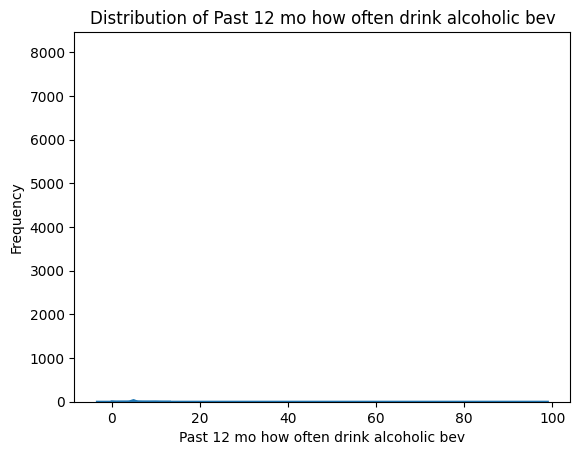

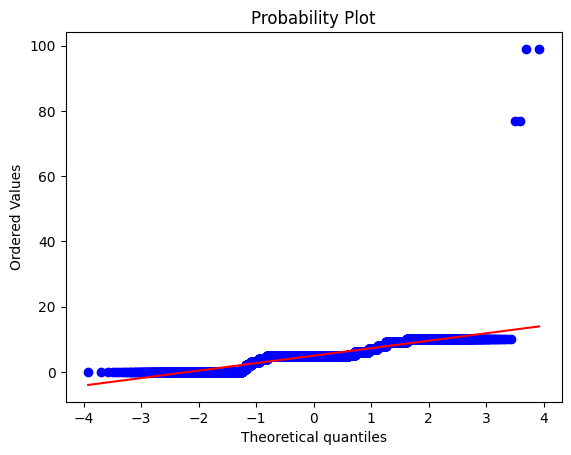

Avg # alcoholic drinks/day - past 12 mos: mu = 4.19, sigma = 24.77
Avg # alcoholic drinks/day - past 12 mos: Skewness: 39.43
Avg # alcoholic drinks/day - past 12 mos: Kurtosis: 1563.47


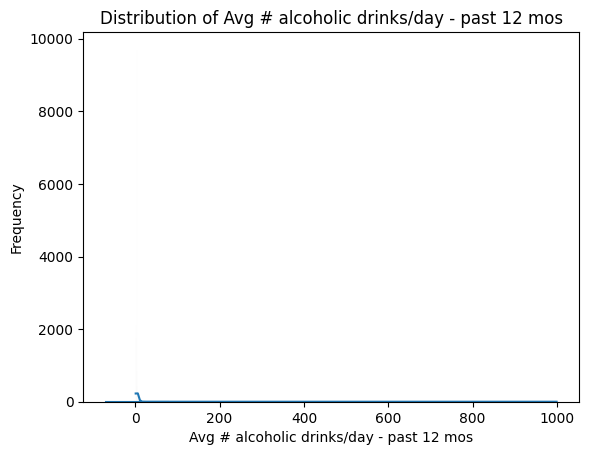

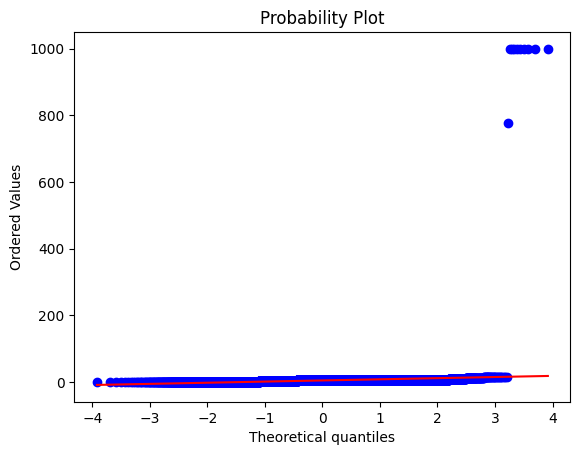

Ever have 4/5 or more drinks every day?: mu = 1.86, sigma = 0.30
Ever have 4/5 or more drinks every day?: Skewness: 6.19
Ever have 4/5 or more drinks every day?: Kurtosis: 182.00


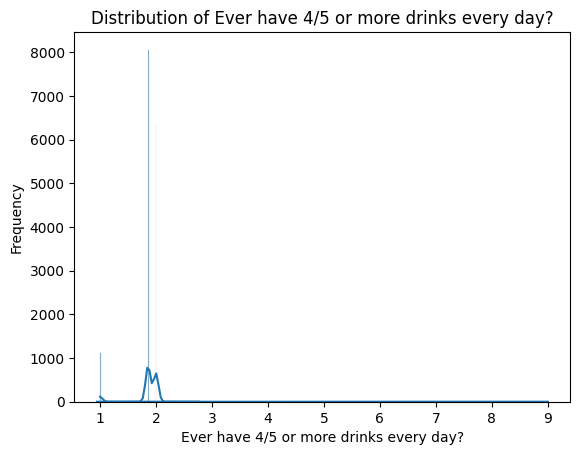

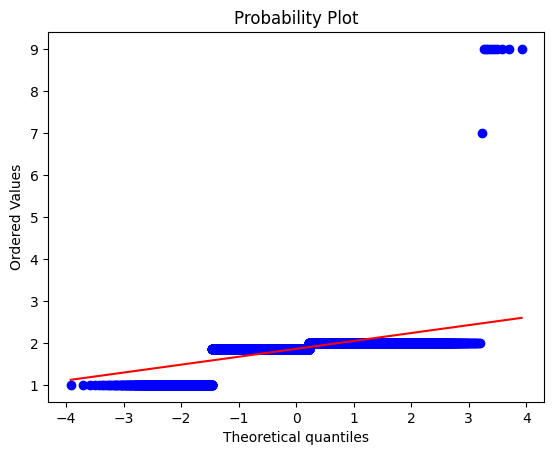

Ever told you had high blood pressure: mu = 1.66, sigma = 0.44
Ever told you had high blood pressure: Skewness: 3.08
Ever told you had high blood pressure: Kurtosis: 59.76


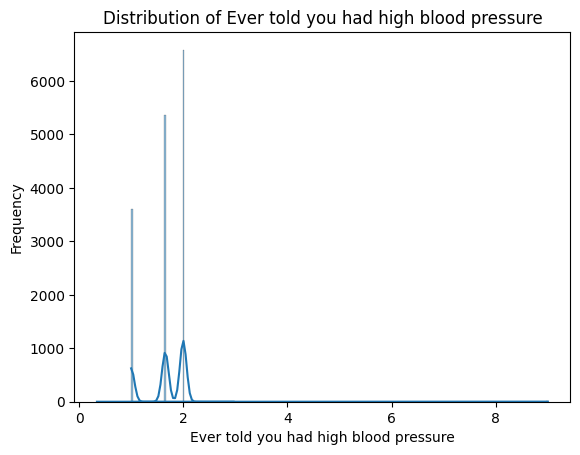

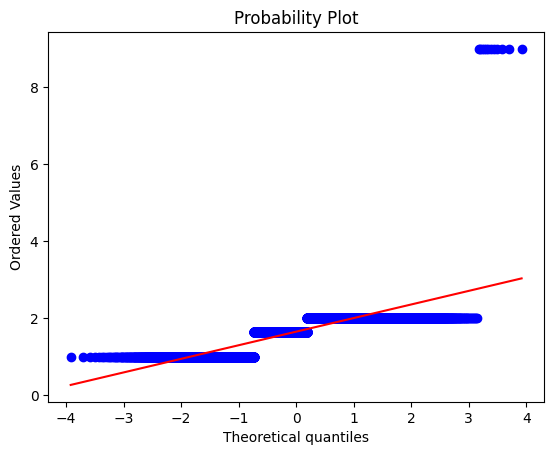

Now taking prescribed medicine for HBP: mu = 1.15, sigma = 0.16
Now taking prescribed medicine for HBP: Skewness: 4.26
Now taking prescribed medicine for HBP: Kurtosis: 19.92


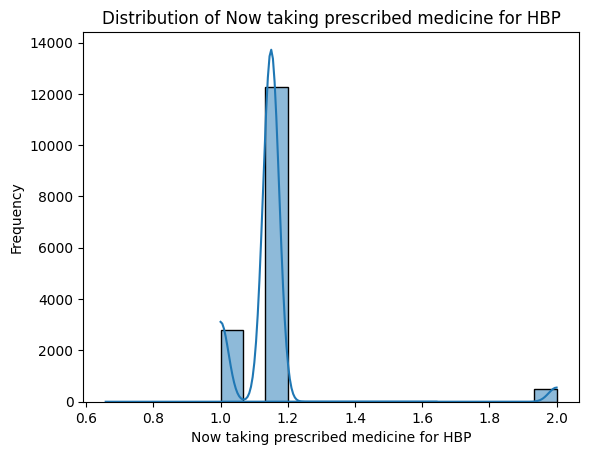

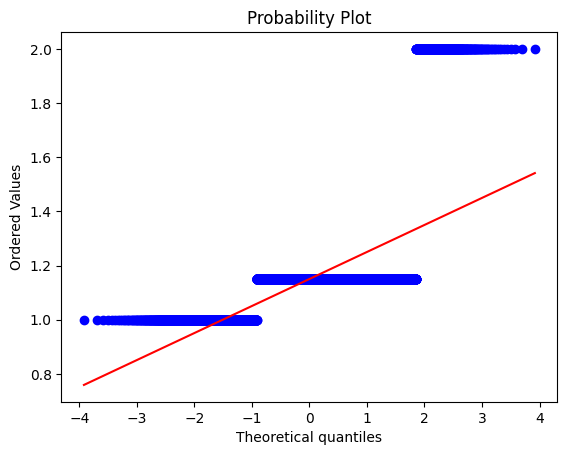

Told to take prescriptn for cholesterol: mu = 1.66, sigma = 0.44
Told to take prescriptn for cholesterol: Skewness: 6.40
Told to take prescriptn for cholesterol: Kurtosis: 112.86


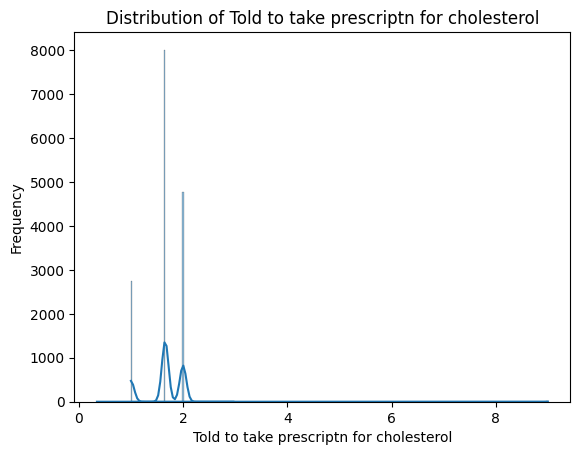

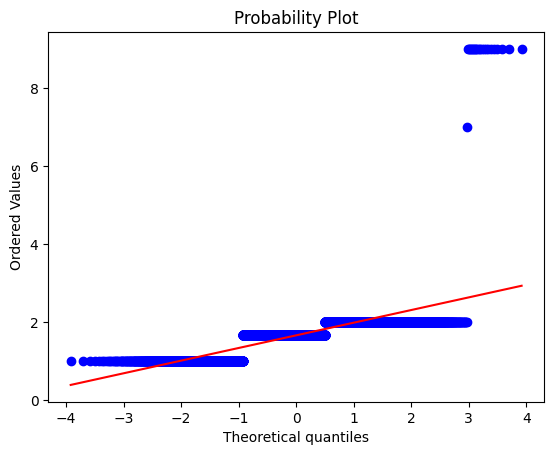

SP ever had pain or discomfort in chest: mu = 1.71, sigma = 0.32
SP ever had pain or discomfort in chest: Skewness: 2.01
SP ever had pain or discomfort in chest: Kurtosis: 73.57


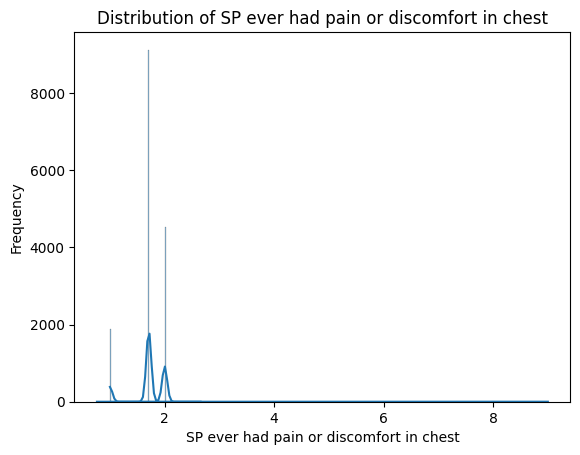

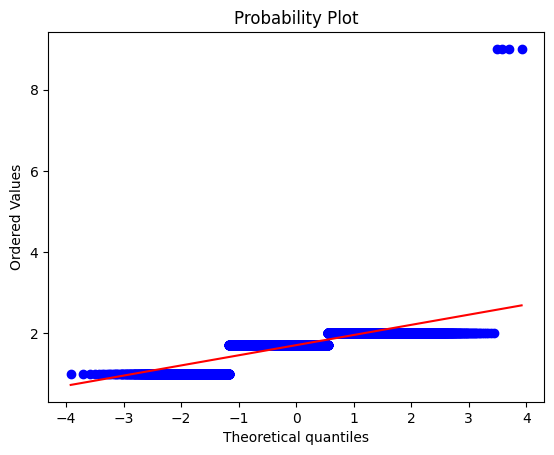

SP get it walking uphill or in a hurry: mu = 1.80, sigma = 0.28
SP get it walking uphill or in a hurry: Skewness: 14.56
SP get it walking uphill or in a hurry: Kurtosis: 382.85


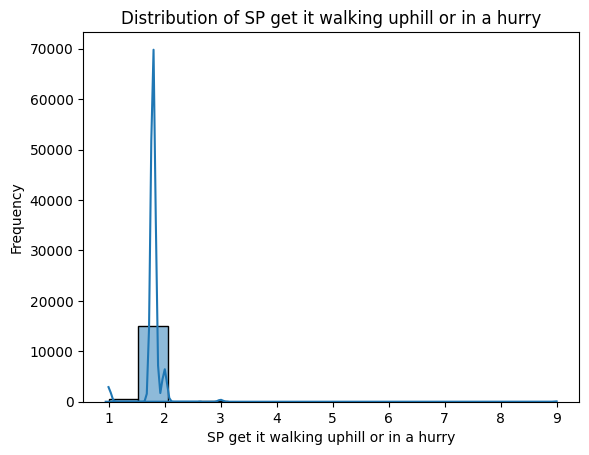

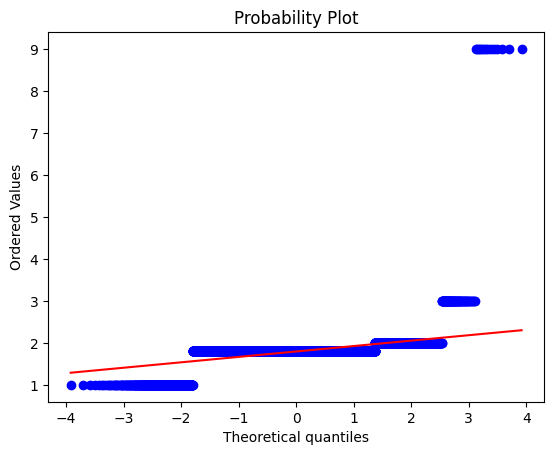

Severe pain in chest more than half hour: mu = 1.79, sigma = 0.22
Severe pain in chest more than half hour: Skewness: 16.61
Severe pain in chest more than half hour: Kurtosis: 585.00


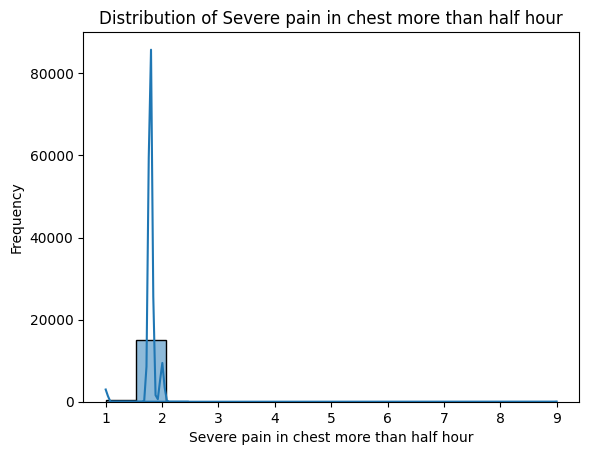

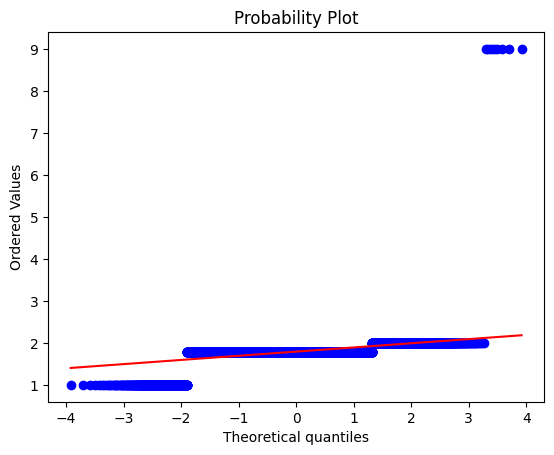

Buy food from fast food/pizza places: mu = 1.10, sigma = 0.20
Buy food from fast food/pizza places: Skewness: 4.07
Buy food from fast food/pizza places: Kurtosis: 15.84


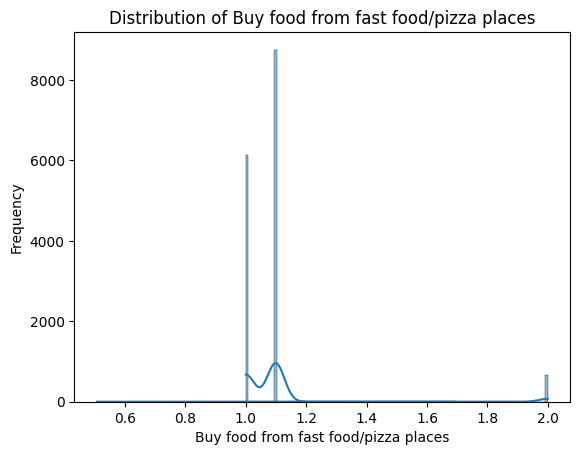

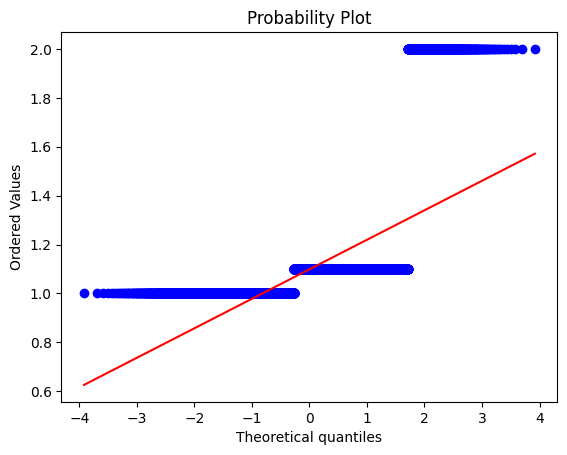

Eat from restaurant w/waiter: mu = 1.25, sigma = 0.28
Eat from restaurant w/waiter: Skewness: 1.79
Eat from restaurant w/waiter: Kurtosis: 2.50


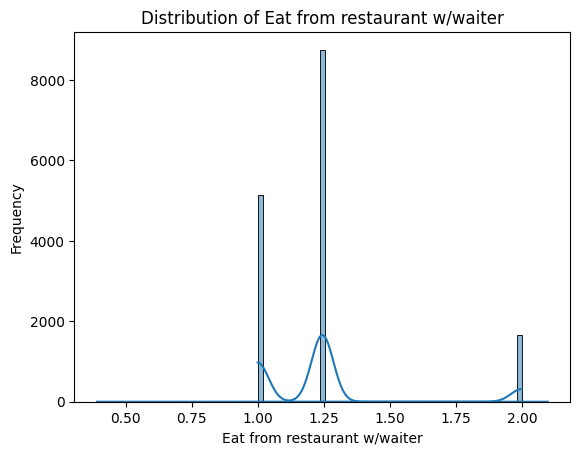

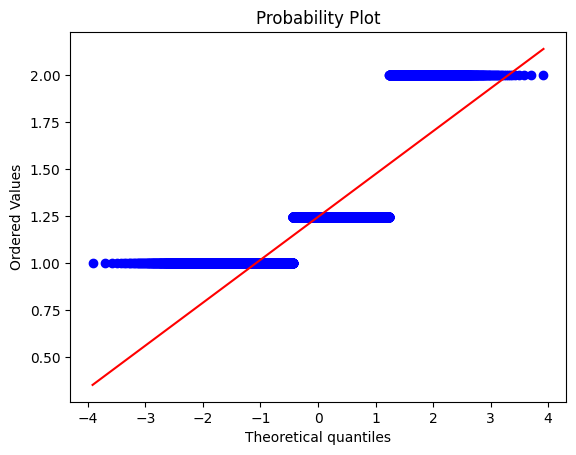

Calories needed per day: mu = 10.02, sigma = 15.85
Calories needed per day: Skewness: 5.19
Calories needed per day: Kurtosis: 26.30


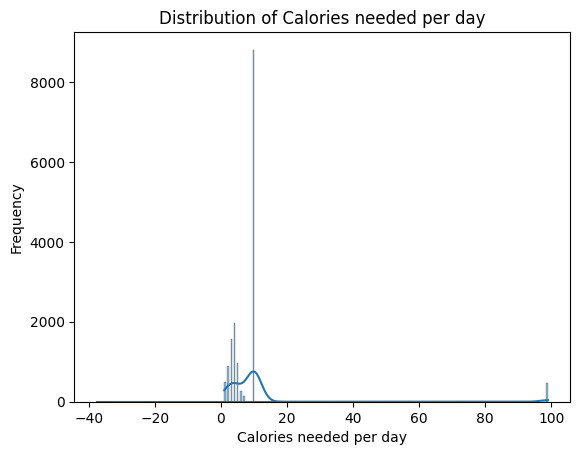

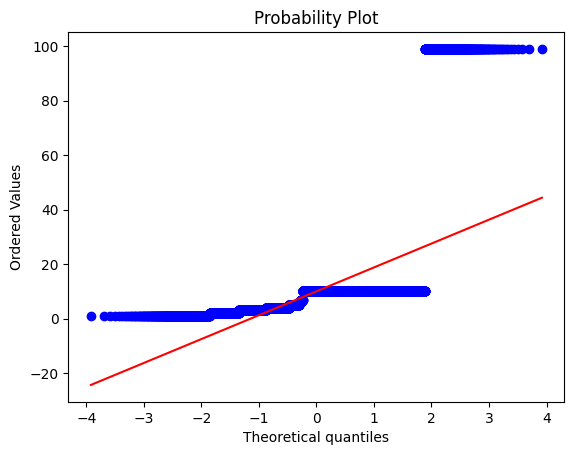

Unit of measure (day/week/month/year)-glucose/sugar: mu = 1.55, sigma = 0.22
Unit of measure (day/week/month/year)-glucose/sugar: Skewness: 5.15
Unit of measure (day/week/month/year)-glucose/sugar: Kurtosis: 52.67


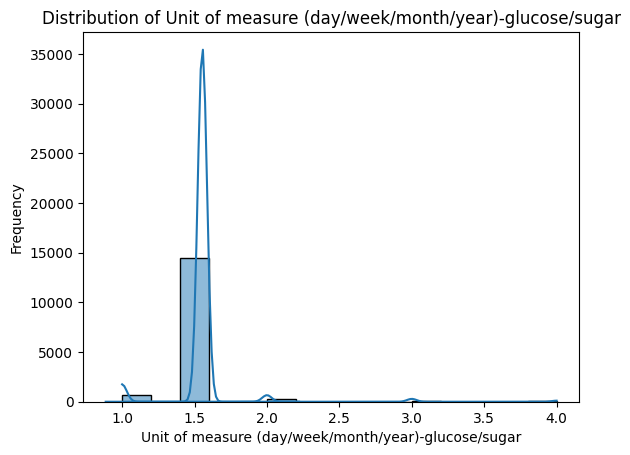

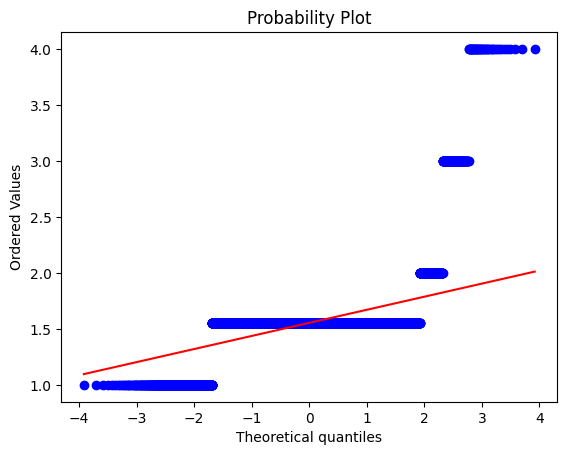

Unit of measure (day/week/month/year)-feet sores: mu = 1.54, sigma = 0.21
Unit of measure (day/week/month/year)-feet sores: Skewness: 5.11
Unit of measure (day/week/month/year)-feet sores: Kurtosis: 54.25


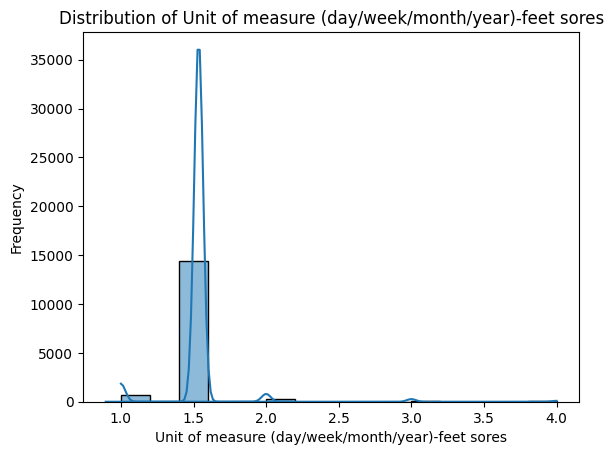

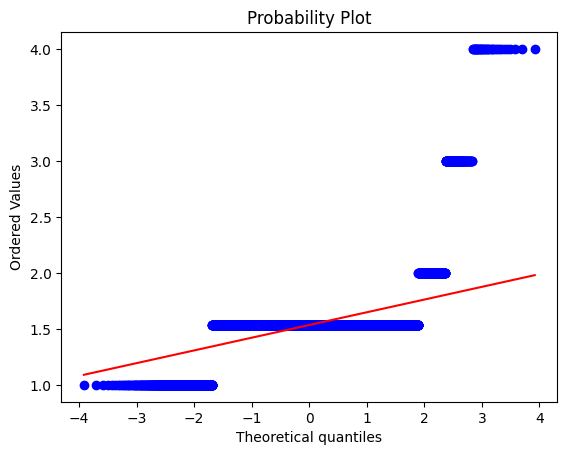

You drink whole or regular milk: mu = 10.54, sigma = 3.90
You drink whole or regular milk: Skewness: 22.57
You drink whole or regular milk: Kurtosis: 509.55


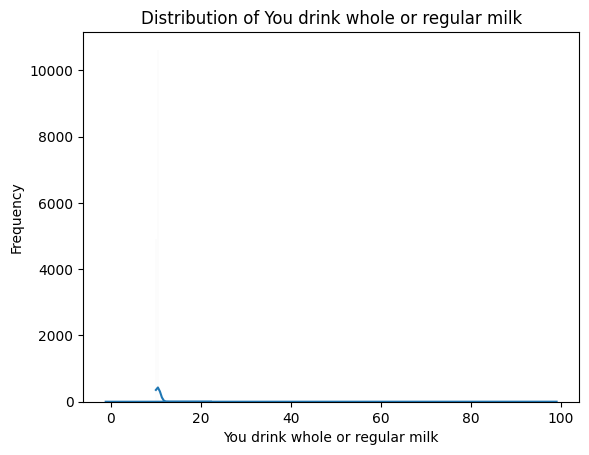

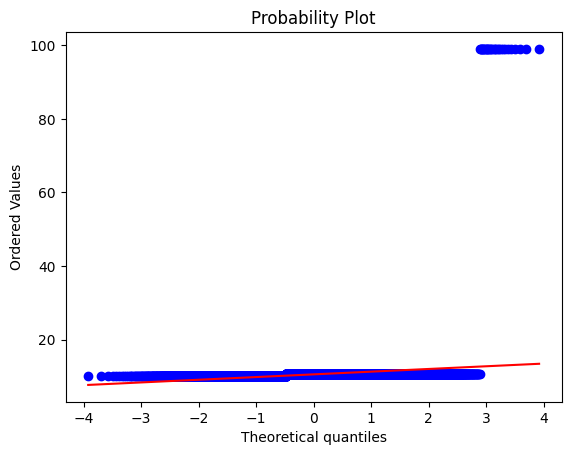

# of meals not home prepared: mu = 26.91, sigma = 465.07
# of meals not home prepared: Skewness: 20.70
# of meals not home prepared: Kurtosis: 432.23


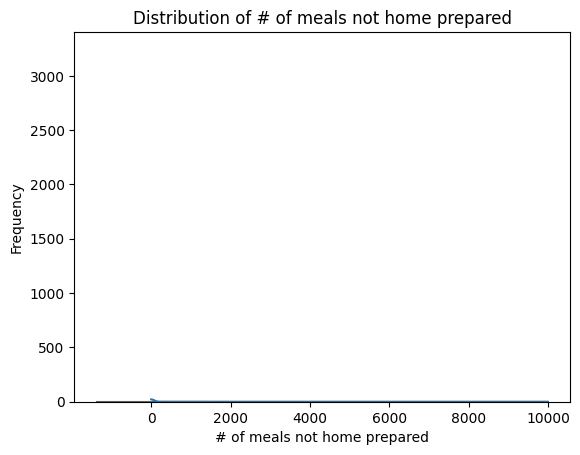

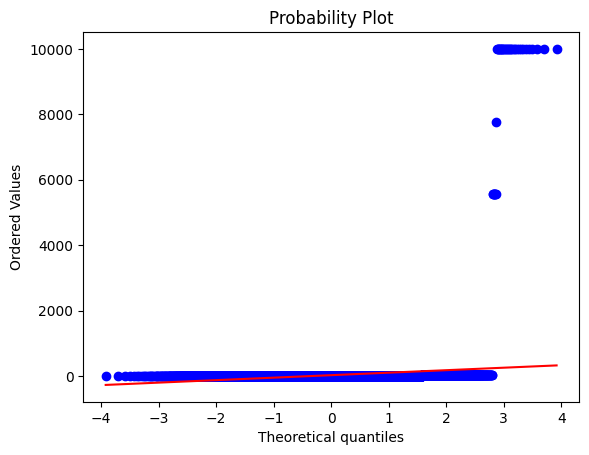

In [18]:
# Create a list of the columns to analyze
columns =['Past 12 mo how often drink alcoholic bev',
       'Avg # alcoholic drinks/day - past 12 mos',
       'Ever have 4/5 or more drinks every day?',
       'Ever told you had high blood pressure',
       'Now taking prescribed medicine for HBP',
       'Told to take prescriptn for cholesterol',
       'SP ever had pain or discomfort in chest',
       'SP get it walking uphill or in a hurry',
       'Severe pain in chest more than half hour',
       'Buy food from fast food/pizza places', 'Eat from restaurant w/waiter',
       'Calories needed per day',
       'Unit of measure (day/week/month/year)-glucose/sugar',
       'Unit of measure (day/week/month/year)-feet sores',
       'You drink whole or regular milk', '# of meals not home prepared']

# Loop over the columns and plot the distribution of each variable
for col in columns:
    # Plot the distribution of the data
    sns.histplot(data[col], kde=True)

    # Fit a normal distribution to the data
    (mu, sigma) = stats.norm.fit(data[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    # Calculate the skewness and kurtosis of the data
    print('{}: Skewness: {:.2f}'.format(col, data[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, data[col].kurt()))

    # Add the fitted normal distribution to the plot
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    # Add labels and title to the plot
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(col))

    # Plot the QQ-plot
    fig = plt.figure()
    stats.probplot(data[col], plot=plt)

    plt.show()

In [19]:
data.head()

,Past 12 mo how often drink alcoholic bev,Avg # alcoholic drinks/day - past 12 mos,Ever have 4/5 or more drinks every day?,Ever told you had high blood pressure,Now taking prescribed medicine for HBP,Told to take prescriptn for cholesterol,SP ever had pain or discomfort in chest,SP get it walking uphill or in a hurry,Severe pain in chest more than half hour,Buy food from fast food/pizza places,...,Sleep hours - weekdays or workdays,Sleep hours - weekends,Ever told doctor had trouble sleeping?,How often feel overly sleepy during day?,Unit of measure (day/week/month/year)-cigarettes,Cigarettes smoked in entire life,How do you consider your weight,Thoughts you would be better off dead,Body Mass Index (kg/m**2),Diabetes affected eyes/had retinopathy
0,1.000000e+01,1.000000,2.0,2.0,1.150351,2.000000,1.0,2.000000,2.000000,1.0,...,7.5,8.0,2.0,5.397605e-79,3.868089,1.000000,1.0,5.397605e-79,26.656847,1.862622
1,5.397605e-79,4.187958,1.0,2.0,1.150351,2.000000,2.0,1.796414,1.793249,1.0,...,8.0,8.0,2.0,2.000000e+00,3.868089,1.371533,3.0,5.397605e-79,17.600000,1.862622
2,5.397605e-79,4.187958,2.0,2.0,1.150351,1.657041,1.0,2.000000,2.000000,1.0,...,8.5,8.0,2.0,1.000000e+00,3.868089,1.371533,3.0,5.397605e-79,15.000000,1.862622
3,4.000000e+00,2.000000,2.0,2.0,1.150351,1.000000,1.0,1.000000,1.000000,2.0,...,10.0,13.0,1.0,3.000000e+00,3.868089,1.371533,3.0,5.397605e-79,37.800000,1.862622
4,5.397605e-79,4.187958,2.0,2.0,1.150351,2.000000,2.0,1.796414,1.793249,1.0,...,6.5,8.0,1.0,2.000000e+00,3.868089,1.371533,2.0,5.397605e-79,26.656847,1.862622


In [20]:
data.corrwith(data['Diabetes affected eyes/had retinopathy']).abs().sort_values(ascending=False)

Diabetes affected eyes/had retinopathy                 1.000000
Unit of measure (day/week/month/year)-glucose/sugar    0.092635
Has DR ever said you have gallstones                   0.038507
# of ready-to-eat foods in past 30 days                0.033660
Ever receive blood transfusion                         0.033351
Abdominal pain during past 12 months?                  0.016765
Ever told you had cancer or malignancy                 0.016644
You drink whole or regular milk                        0.015359
Sleep hours - weekends                                 0.011948
Doctor ever said you were overweight                   0.010417
Eat from restaurant w/waiter                           0.009028
Severe pain in chest more than half hour               0.007911
Past 12 mo how often drink alcoholic bev               0.006568
Buy food from fast food/pizza places                   0.006515
Ever told you had high blood pressure                  0.006248
How do you consider your weight         

[]

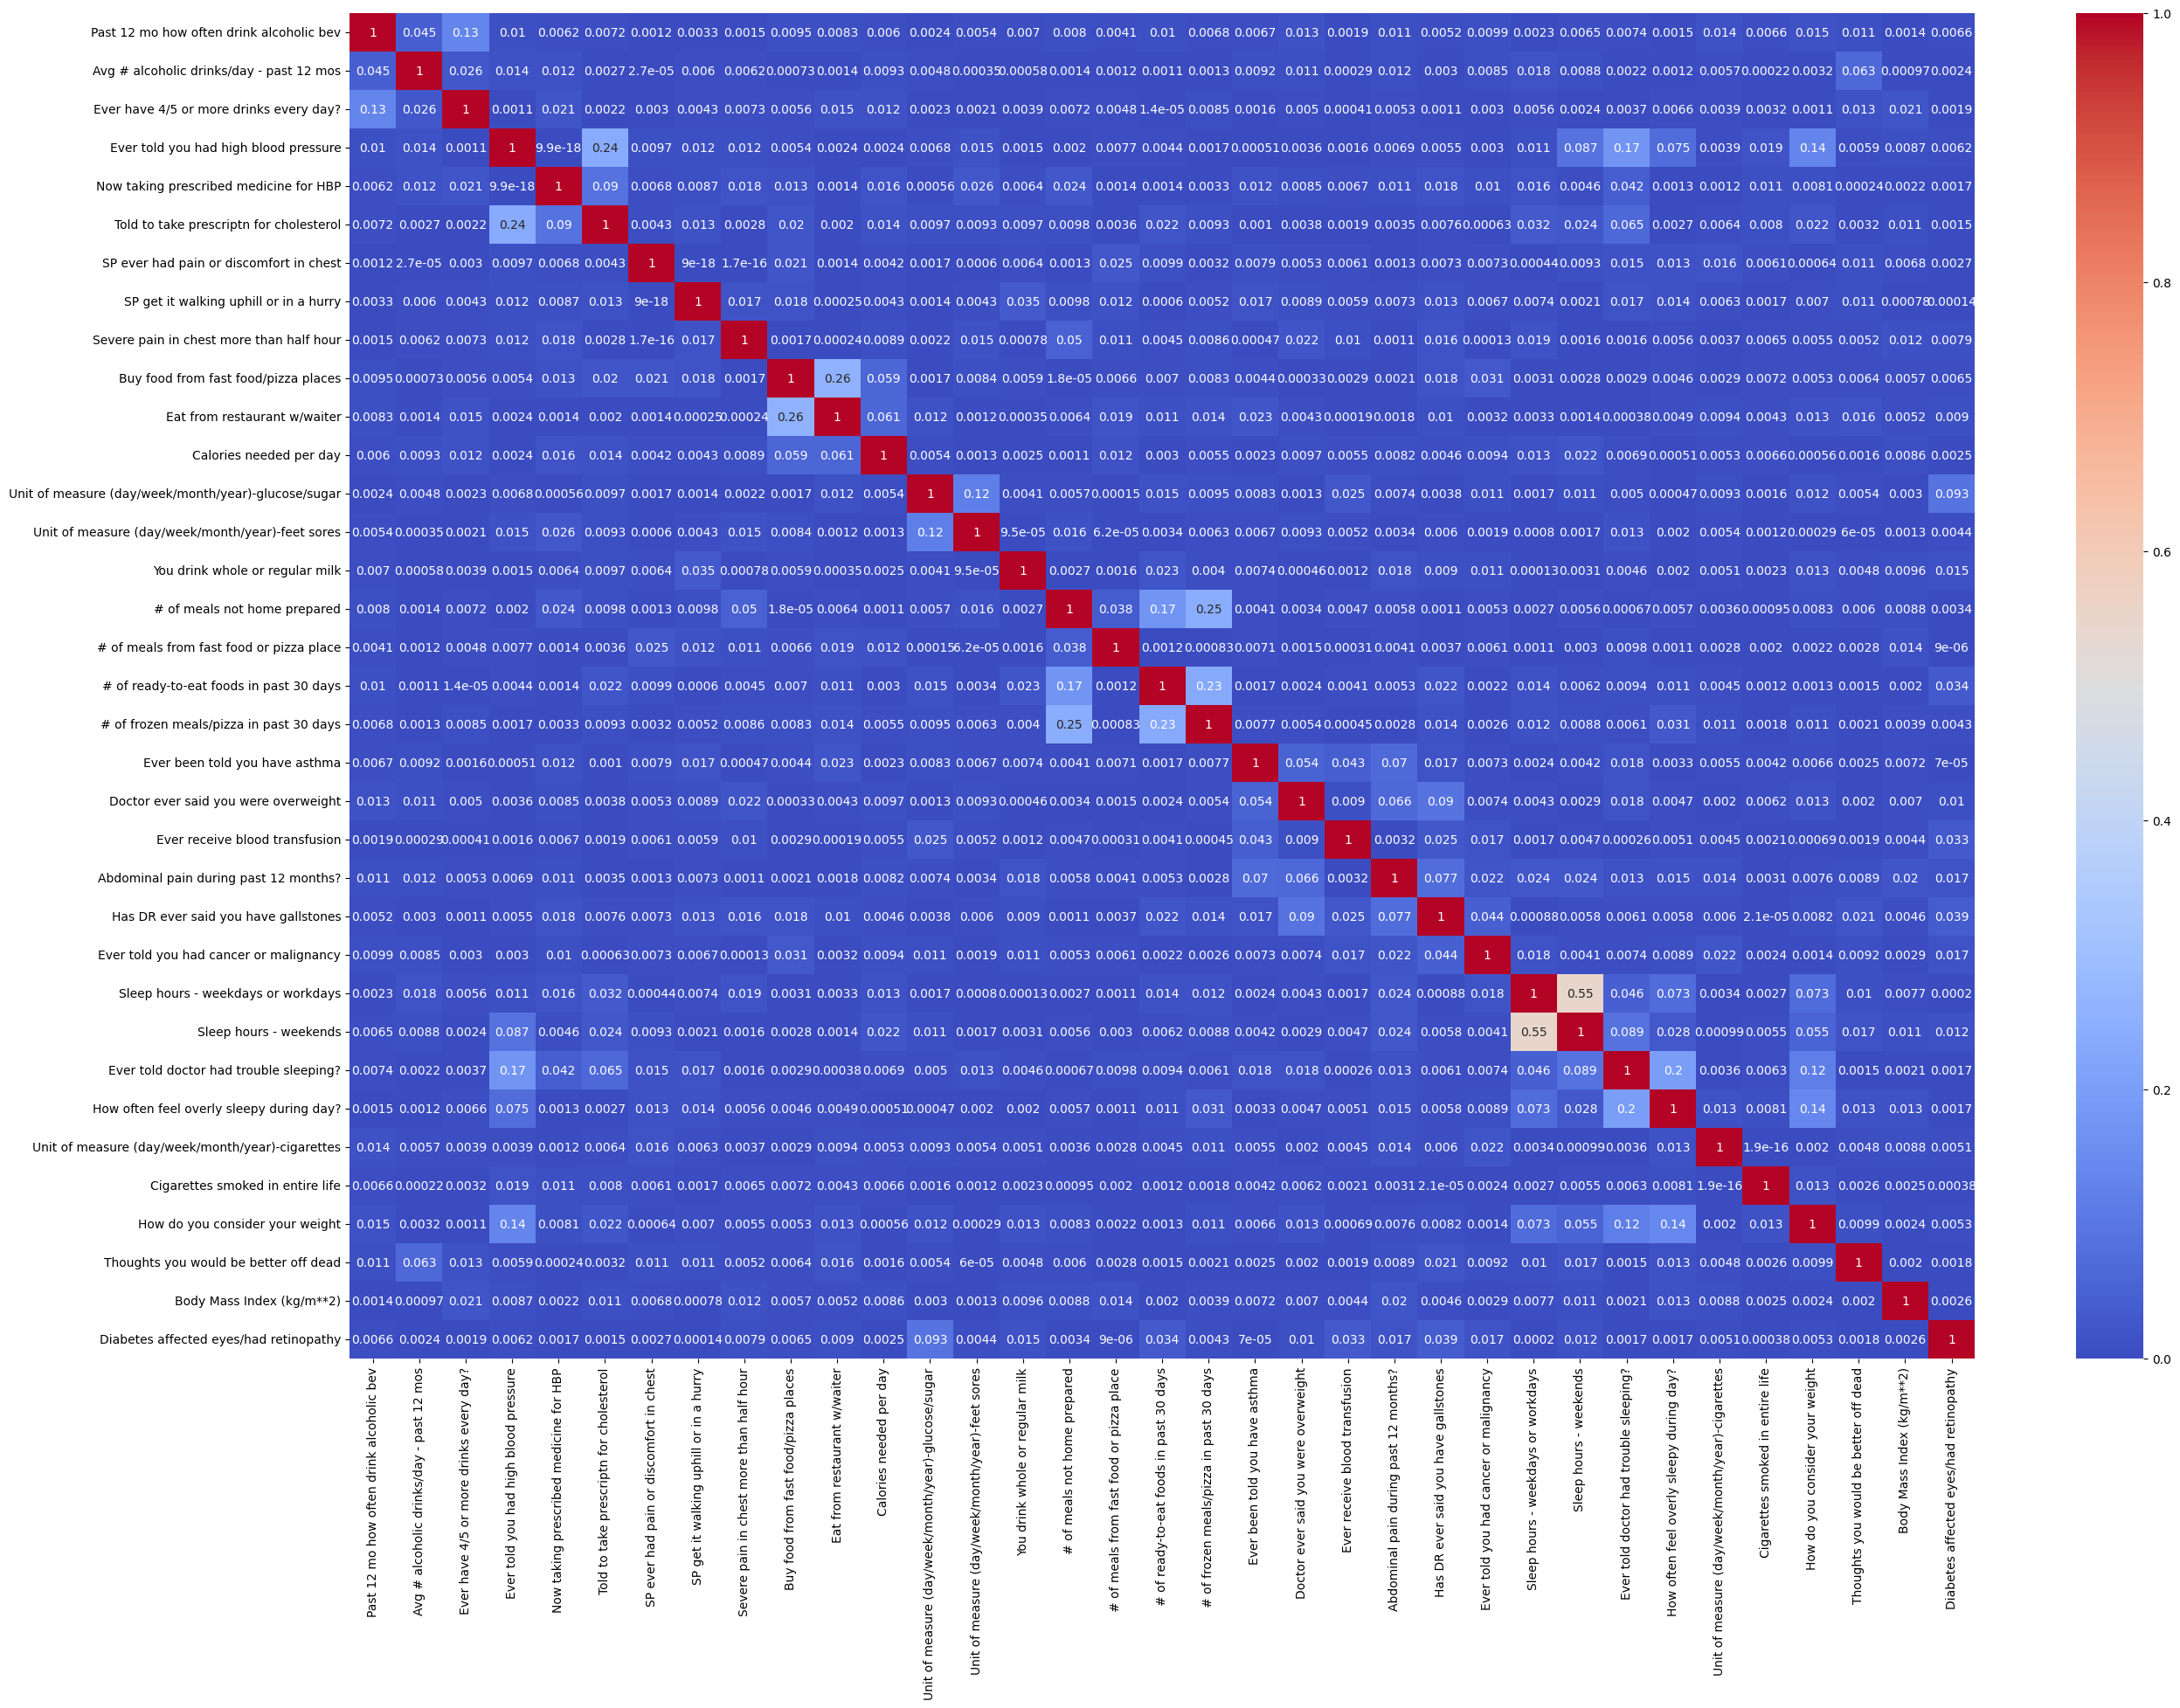

In [22]:
corrm=data.corr().abs()
plt.figure(figsize=(30,20))
sns.heatmap(corrm, cmap="coolwarm", annot=True)
plt.plot()

In [23]:
X=data.drop('Diabetes affected eyes/had retinopathy',axis=1)
Y=data['Diabetes affected eyes/had retinopathy'].copy()
Y = Y.astype(int)

In [24]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, Y)
mutual_info

array([2.73048590e-03, 2.16616824e-03, 0.00000000e+00, 1.10114458e-03,
       1.89558812e-03, 0.00000000e+00, 1.20725707e-03, 3.09870198e-03,
       1.36885004e-03, 0.00000000e+00, 1.68039957e-03, 2.06171427e-03,
       1.40998219e-01, 1.49133544e-01, 2.41712303e-03, 6.47493316e-04,
       0.00000000e+00, 1.41459100e-03, 7.46179194e-04, 3.91399887e-03,
       4.21621292e-02, 1.72527986e-02, 3.79908513e-02, 3.89667967e-02,
       3.64186797e-02, 2.36490121e-03, 1.80442509e-03, 3.51886426e-03,
       1.11747803e-03, 8.40531693e-05, 4.93585844e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Assuming you have your feature matrix X and target variable y

# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2, 4],
    'positive': [True]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best MSE:", mse)


Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': True}
Best MSE: 0.13131773863659418


In [28]:
from sklearn.linear_model import LogisticRegression
LgR_model=LogisticRegression(max_iter=2000)
LgR_model.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

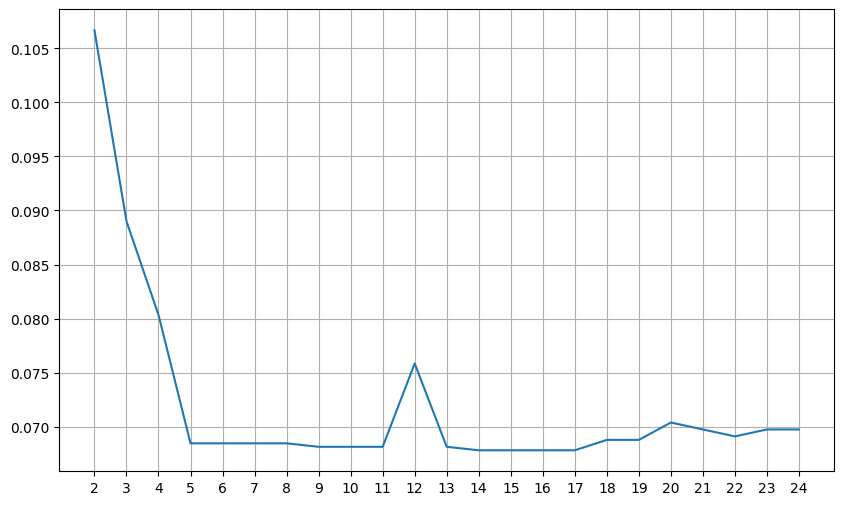

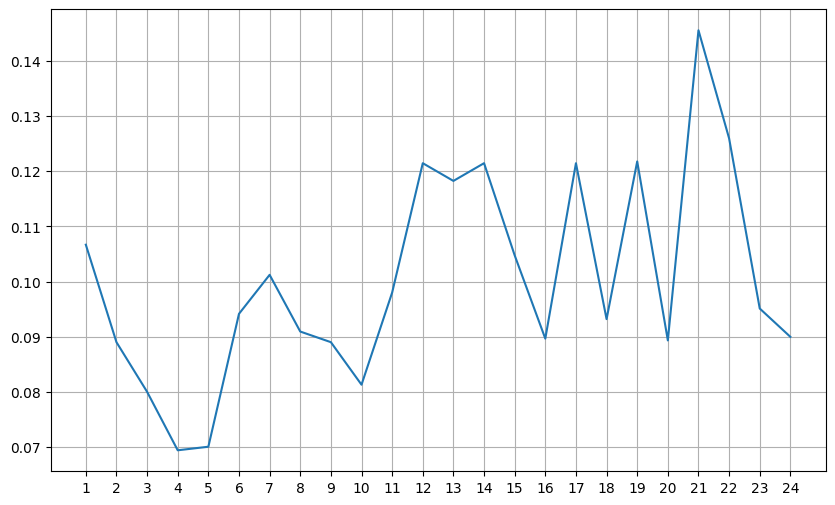

In [29]:
from sklearn import metrics,tree
f1 = []
for k in range(2,25):
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.mean_squared_error(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(2,25),f1)
plt.xticks(range(2,25))
plt.grid()
plt.show()

f1 = []
for k in range(1,25):
    dt = tree.DecisionTreeClassifier(max_depth=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.mean_squared_error(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()


In [30]:
from sklearn import tree
DT_model = tree.DecisionTreeClassifier(max_leaf_nodes=13,max_depth=10)
DT_model = DT_model.fit(x_train, y_train)

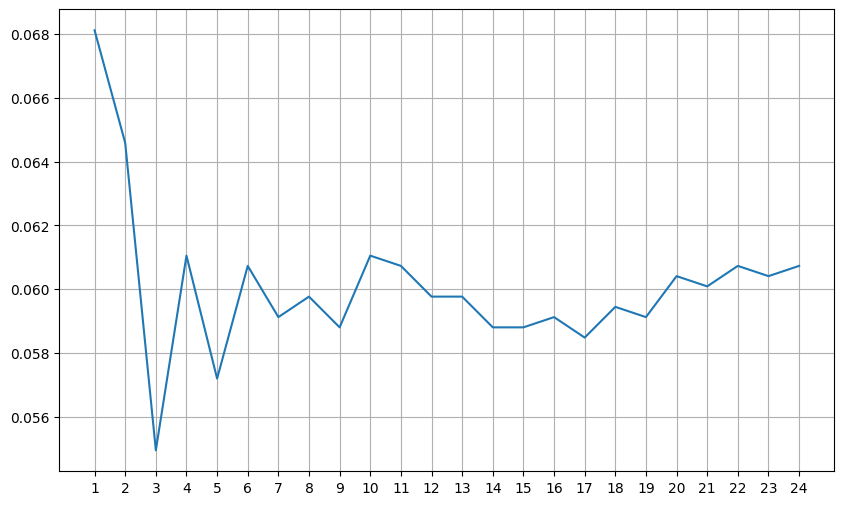

In [31]:
from sklearn.neighbors import KNeighborsClassifier
f1 = []
for k in range(1,25):
    knn_model =KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    y_predict = knn_model.predict(x_test)
    f1.append(metrics.mean_absolute_error(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [32]:
#applying KNeighbors Classifier
knn_model =KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [33]:
def evaluation(model):
  score = model.score(x_test, y_test)
  y_predicted=model.predict(x_test)
  mse=metrics.mean_squared_error(y_test,y_predicted)
  mae=metrics.mean_absolute_error(y_test,y_predicted)
  print("Mean Squared error: ", mse)
  print("Mean Absolute error: ", mae)

In [34]:
evaluation(knn_model)

Mean Squared error:  0.10443444730077121
Mean Absolute error:  0.05494858611825193


In [35]:
evaluation(best_model)

Mean Squared error:  0.13131773863659418
Mean Absolute error:  0.1495750092944124


In [36]:
evaluation(LgR_model)

Mean Squared error:  0.13753213367609254
Mean Absolute error:  0.08354755784061697


In [37]:
evaluation(DT_model)

Mean Squared error:  0.06812339331619537
Mean Absolute error:  0.027634961439588688


In [39]:
dump(DT_model, 'model.joblib')

['model.joblib']